# Decision Trees for Classifcation

# Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In this notebook, we will use the abalone dataset for classification.

Abalone is a type of consumable snail whose price varies as per its age. The aim is to predict the age of abalone from physical measurements. The age of abalone is traditionally determined by cutting the shell through the cone, staining it, and counting the no. of rings through a microscope - a boring and time consuming task indeed! Other measurements are easier to obtain, and are used to predict the age.

In [2]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
abalone_data = pd.read_csv(url, header=None, names=column_names)

Let's now see the type and name of the features:

- **Sex:** This is the gender of the abalone and has categorical value (M,F or I).
- **Length:** The longest measurement of the abalone shell in mm. Continuous numeric value.
- **Diameter:** The measurement of the abalone shell perpendicular to length in mm. Continuous numeric value.
- **Height:** Height of the shell in mm. Continuous numeric value.
- **Shucked weight:** Weight of just meat in the abalone in grams. Continuous numeric value.
- **Viscera weight:** Weight of the abalone after bleeding in grams. Continuous numeric value.
- **Shell weight:** Weigth of the abalone after being dried in grams. Continuous numeric value.
- **Rings:** This is the target, that is the feature that we will train the model to predict. As mentioned earlier, we are interested in the age of the abalone and it has been established that the no. of rings + 1.5 gives the age. Discrete numeric value.

In [3]:
type(abalone_data)

pandas.core.frame.DataFrame

# Examining the dataset

In [4]:
abalone_data.shape

(4177, 9)

In [5]:
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


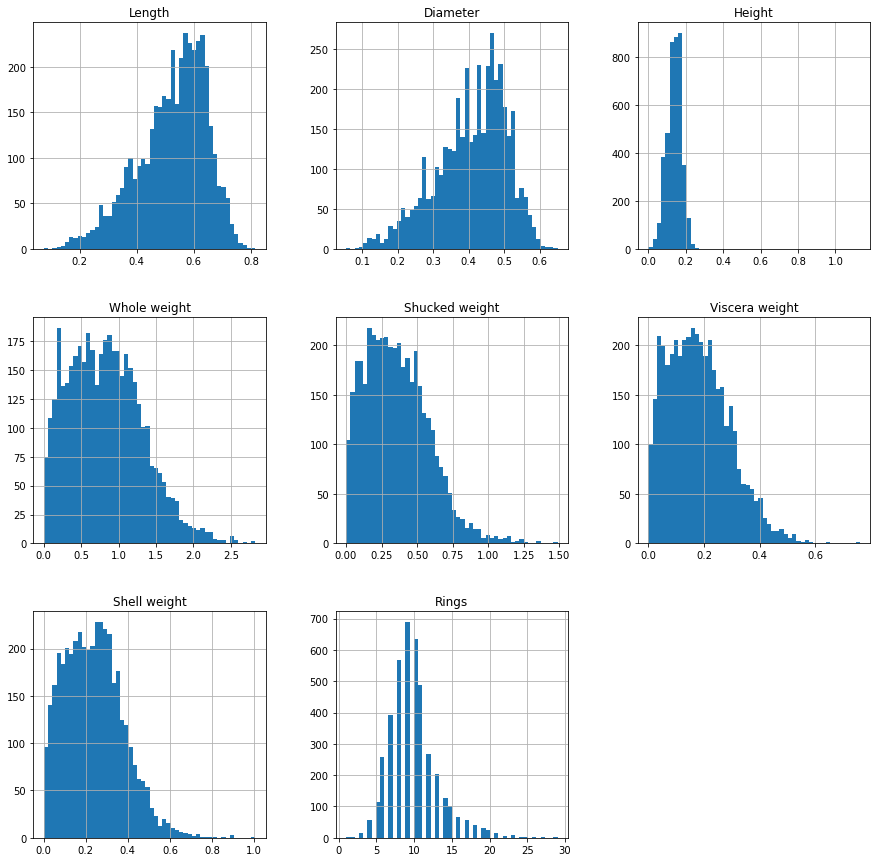

In [6]:
abalone_data.hist(bins=50, figsize=(15,15))
# display histogram
plt.show()

<Figure size 432x288 with 0 Axes>

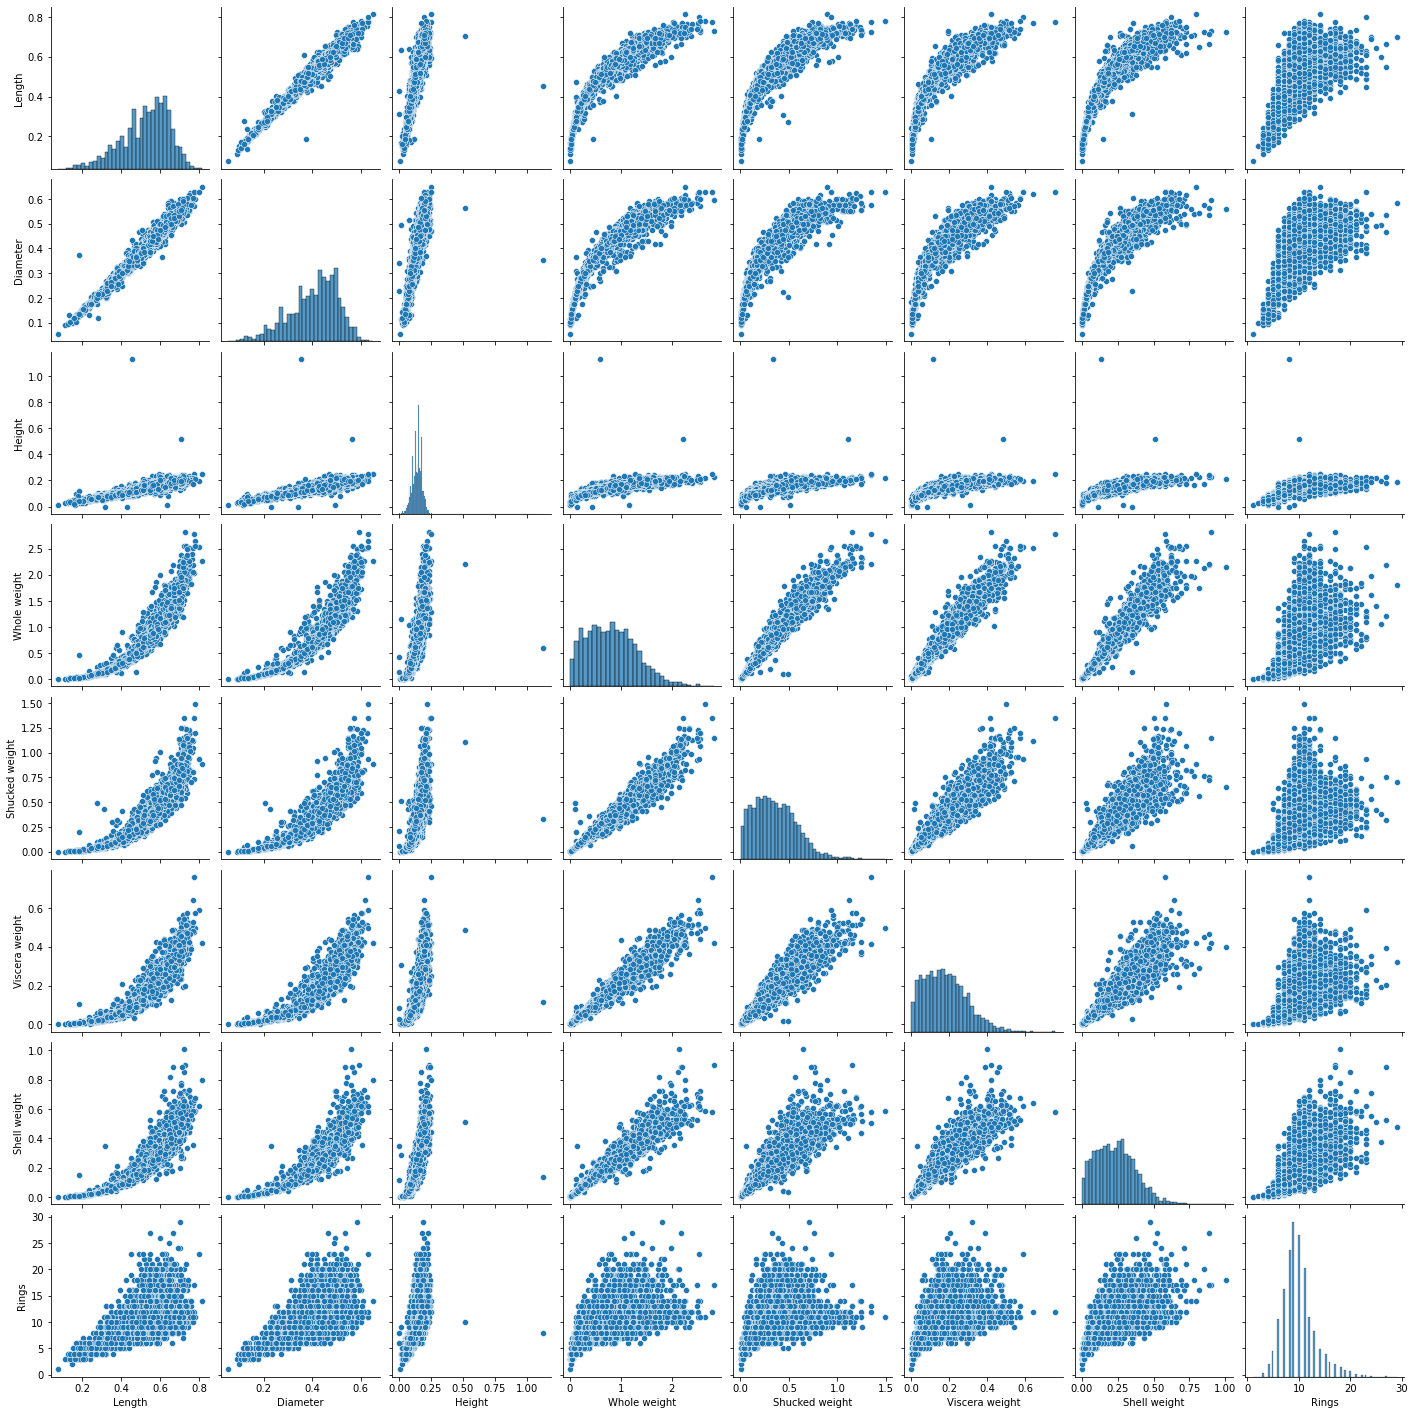

In [7]:
plt.figure()
sns.pairplot(abalone_data, diag_kind="hist")
plt.show()

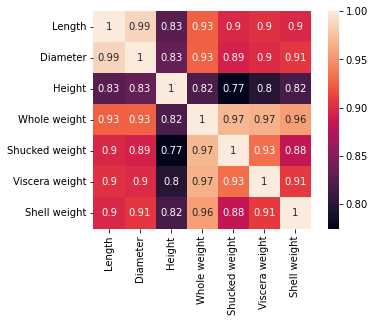

In [8]:
plt.figure()
sns.heatmap(abalone_data.iloc[:,:-1].corr(), annot=True, square=True)
plt.show()

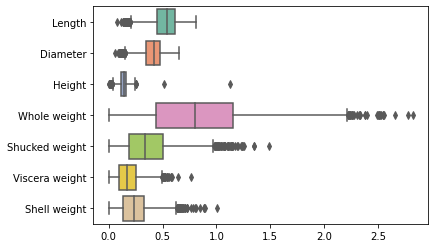

In [9]:
plt.figure()
sns.boxplot(data=abalone_data.iloc[:,:-1], orient='h', palette="Set2")
plt.show()

We find different features to be having different ranges through this box-plot, which indicates that scaling of features may be useful.

In [10]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


From the information above, all features are continous variables except for the `Sex` feature.

In [11]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


The `count` row shows that there are no missing values.

However, in height feature, the minimum value is zero. This possibility calls for a missing value in the data and we will process the missing value.\

Next, take a look at the target in this case in the `Rings` column.

In [12]:
abalone_data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24])

In [13]:
abalone_data['Rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

We can see that the target is $1$ to $29$ (but there is no $28$!), so the classification we are going to do is a multi-class classification.

# Missing Values

We first check how many missing values are in the `Height` feature and which class is it in.

In [15]:
(abalone_data['Height'] == 0).sum()

2

In [16]:
abalone_data[abalone_data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


So, the no. of missing values is $2$ and is in the infant (`I`) sex. Then we can change the value $0$ to null. We fill in the missing value with the average of `Height` feature for the `I` gender.

In [17]:
means = pd.pivot_table(abalone_data, index=['Sex'], aggfunc={'Height':np.mean})
means

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


So, we fill the missing value with `0.107996` (we do this while pre-processing).

# Pre-processing

In [20]:
X = abalone_data.iloc[:,:-1]
y = abalone_data.iloc[:,-1]

In [21]:
X[:5]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)

We will use pipelines to perform preprocessing of the data, which will include:
- handling missing (or 0) values
- scaling the features
- handling categorical features (viz., `Sex` in this case)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

Identifying numeric and categorical features (to be able to preprocess them differently).

In [24]:
numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
categorical_features = ['Sex']

In [25]:
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(missing_values=0, strategy='constant', fill_value=0.107996)),
    ('scaler', StandardScaler())
])

In [26]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Let's visualize `preprocessor`:

In [28]:
from sklearn import set_config
set_config(display='diagram')
# displays HTML representation in a jupyter context
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0.107996,
                                                                missing_values=0,
                                                                strategy='constant')),
                                                 ('scaler', StandardScaler())]),
                                 ['Length', 'Diameter', 'Height',
                                  'Whole weight', 'Shucked weight',
                                  'Viscera weight', 'Shell weight']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex'])])

Now, we append the classifier to the preprocessing pipeline.

Now, we have a full prediction pipeline ready.

In [29]:
dt_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=3,
        random_state=69
    ))
])

In [30]:
dt_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0.107996,
                                                                                 missing_values=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole weight',
                                                   'Shucked weight',
                                                   'Viscera weight',
                                                   'Shell weight']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=69))])

# Evaluation

In [31]:
y_test_hat = dt_clf.predict(X_test)

Let's compare the actual and predicted values for a few example.

In [34]:
comparison = np.concatenate((y_test_hat.reshape(len(y_test_hat),1), y_test.values.reshape(len(y_test),1)),1)

i = 0
for each in comparison:
    if i<20:
        print(each)
        i+=1
    else:
        break

[10  8]
[7 8]
[7 8]
[10 10]
[7 6]
[ 8 14]
[5 5]
[11 11]
[7 6]
[9 5]
[7 7]
[7 7]
[11 10]
[11  9]
[10 16]
[8 7]
[10 15]
[7 8]
[7 7]
[10 17]


In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  8  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  9  0 11  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7  0 24  2  5  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0 48 15 17  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0 23 47 23 17  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10 44 17 42 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 32 14 52 32  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3 17  6 22 42  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  3 15 20  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  3 10 19  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  9  0  7 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  7  0  9 10  0  0  0  0  

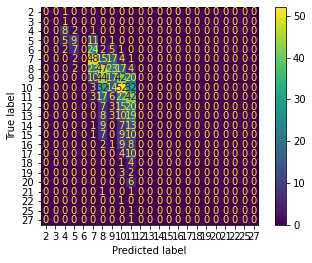

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test)
plt.show()

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.47      0.73      0.57        11
           5       0.41      0.35      0.38        26
           6       0.00      0.00      0.00        41
           7       0.38      0.55      0.45        87
           8       0.25      0.41      0.31       116
           9       0.19      0.13      0.15       133
          10       0.26      0.39      0.32       133
          11       0.22      0.47      0.30        90
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00        40
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00        27
          16       0.00      0.00      0.00        20
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00         5
          19       0.00    

/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Cross Validation

In [45]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(
    dt_clf,
    X_train, y_train,
    cv = 10
)

/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [46]:
type(acc)

numpy.ndarray

In [48]:
print("Accuracy of each fold (in %): ", list(acc*100))
print("Accuracy: {:.2f} %".format(acc.mean()*100))

Accuracy of each fold (in %):  [20.597014925373134, 26.646706586826348, 23.053892215568865, 24.550898203592812, 29.041916167664674, 25.449101796407188, 25.149700598802394, 26.047904191616766, 23.952095808383234, 27.844311377245507]
Accuracy: 25.23 %


# Visualization

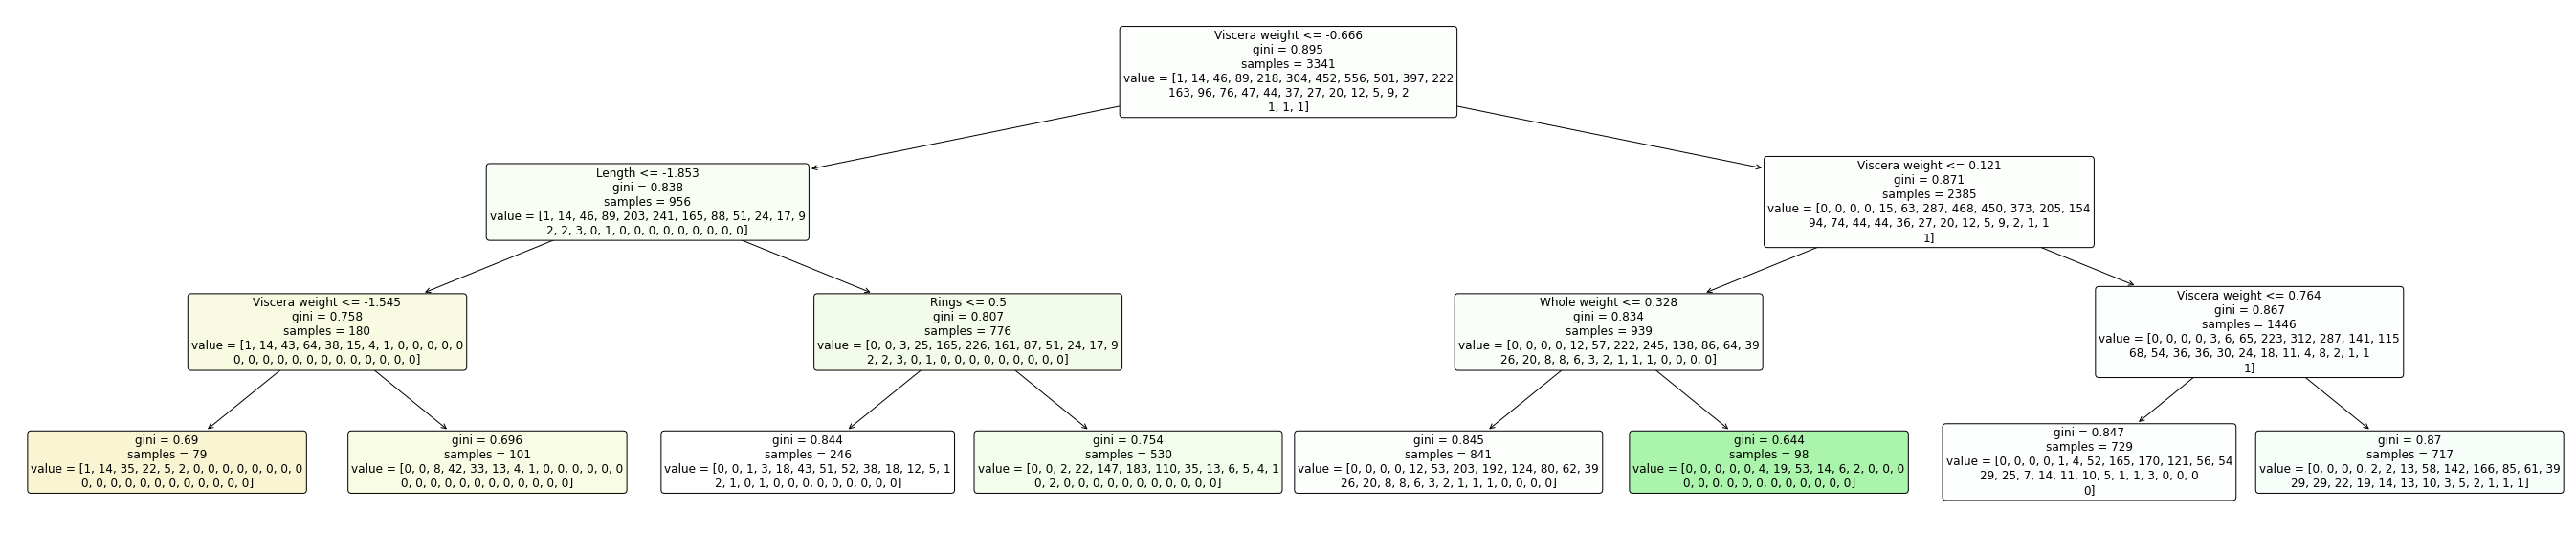

In [51]:
from sklearn.tree import plot_tree

# plt the figure, setting a white background
plt.figure(figsize=(48,10), facecolor='w')

# create tree plot
plot_tree(
    # the Decision Tree classifier
    dt_clf[-1],
    # use the feature names stored
    feature_names=column_names,
    rounded=True,
    filled=True,
    fontsize=12
)
# show the plot
plt.show()

# Hyperparameter Tuning

We try to find the best parameters by using `GridSearchCV` to tune the hyperparameters.

In [52]:
X_train_new = preprocessor.fit_transform(X_train)
X_test_new = preprocessor.fit_transform(X_test)

In [58]:
from sklearn.model_selection import GridSearchCV

dt_param_grid = [{
    'max_depth':range(1,10),
    'min_samples_split':range(2,12,2)
}]
scores = ['recall']

for score in scores:
    print()
    print(f"Tuning hyperparameters for {score}:")
    print()

    gs_dt = GridSearchCV(
        DecisionTreeClassifier(random_state=69),
        dt_param_grid,
        scoring = f'{score}_macro'
    )

    gs_dt.fit(X_train_new, y_train)

    print("Best parameters: ", gs_dt.best_params_)
    print()
    print("Grid Scores:\n")
    means = gs_dt.cv_results_['mean_test_score']
    stds = gs_dt.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, gs_dt.cv_results_['params']):
        print(f"{mean:0.3f} (+/- {std:0.03f}) for {params}")


Tuning hyperparameters for recall:



/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Volumes/SKK-T7/Apps/conda_envs/skk-mlp-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWar

Best parameters:  {'max_depth': 8, 'min_samples_split': 2}

Grid Scores:

0.073 (+/- 0.001) for {'max_depth': 1, 'min_samples_split': 2}
0.073 (+/- 0.001) for {'max_depth': 1, 'min_samples_split': 4}
0.073 (+/- 0.001) for {'max_depth': 1, 'min_samples_split': 6}
0.073 (+/- 0.001) for {'max_depth': 1, 'min_samples_split': 8}
0.073 (+/- 0.001) for {'max_depth': 1, 'min_samples_split': 10}
0.112 (+/- 0.009) for {'max_depth': 2, 'min_samples_split': 2}
0.112 (+/- 0.009) for {'max_depth': 2, 'min_samples_split': 4}
0.112 (+/- 0.009) for {'max_depth': 2, 'min_samples_split': 6}
0.112 (+/- 0.009) for {'max_depth': 2, 'min_samples_split': 8}
0.112 (+/- 0.009) for {'max_depth': 2, 'min_samples_split': 10}
0.132 (+/- 0.016) for {'max_depth': 3, 'min_samples_split': 2}
0.132 (+/- 0.016) for {'max_depth': 3, 'min_samples_split': 4}
0.132 (+/- 0.016) for {'max_depth': 3, 'min_samples_split': 6}
0.132 (+/- 0.016) for {'max_depth': 3, 'min_samples_split': 8}
0.132 (+/- 0.016) for {'max_depth': 3, 'mi

Let's create a new pipeline using the best features as identified above.

In [63]:
# Append the classifier to the preprocessing pipeline
# Now, we have a full preiction pipeline

best_dt_clf = Pipeline([
    ('preprocessor', preprocessor),
    ('best_classifier', gs_dt.best_estimator_)
])

In [64]:
best_dt_clf.fit(X_train, y_train)
print("Model Score: %.3f" % best_dt_clf.score(X_test, y_test))

Model Score: 0.250


We observe an improvement in the model score!